活性化関数：パーセプトロンが受け取った信号の総和が0より大きければ1を出力、みたいなやつ

ステップ関数

(-0.1, 1.1)

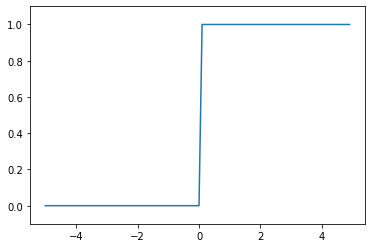

In [1]:
import numpy as np
import matplotlib.pylab as plt

def step_function(x):
    return np.array(x > 0, dtype=np.int)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # y 軸の範囲を指定

シグモイド関数

(-0.1, 1.1)

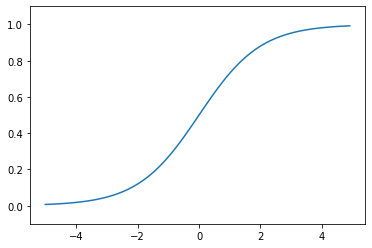

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)

活性化関数は線形だと意味がない\
← 線形の層をいくら重ねても、単一の層として表現できてしまう

In [3]:
B = np.array([[1,2], [3,4], [5,6]])
B

array([[1, 2],
       [3, 4],
       [5, 6]])

↑\
1 2\
3 4\
5 6\
という行列

In [4]:
print(B.ndim)
print(B.shape)

2
(3, 2)


行列の積

In [5]:
A = np.array([[1,2], [3,4]])
B = np.array([[5,6], [7,8]])
np.dot(A, B)

array([[19, 22],
       [43, 50]])

In [6]:
A * B  # だと、各項のかけ算になる

array([[ 5, 12],
       [21, 32]])

ニューラルネットワークを行列の積で

In [7]:
X = np.array([1, 2])
W = np.array([[1, 3, 5], [2, 4, 6]])
print(X.shape)
print(W.shape)

(2,)
(2, 3)


In [8]:
Y = np.dot(X, W)
Y

array([ 5, 11, 17])

In [9]:
def identity_function(x):
    return x

def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])  # 重みは行列(n次元のベクトルをm次元のベクトルにする)
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    return network

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    return y

network = init_network()
x = np.array([1.0, 0.5])  # 入力はベクトル
y = forward(network, x)
y

array([0.31682708, 0.69627909])

回帰問題の出力層の活性化関数は恒等関数を使う
分類はソフトマックス

In [10]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

In [11]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c) # オーバーフロー対策
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

In [12]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)
np.sum(y)  # 合計が1になる

[0.01821127 0.24519181 0.73659691]


1.0

### 手書き文字認識

In [13]:
import sys, os
sys.path.append(os.pardir) # 親ディレクトリのファイルをインポートするための設定
from dataset.mnist import load_mnist

In [14]:
%mkdir ch03

In [15]:
%cd ch03

/content/ch03


In [16]:
(x_train, t_train), (x_test, t_test) = \
load_mnist(flatten=True, normalize=False)

# それぞれのデータの形状を出力
print(x_train.shape) # (60000, 784)
print(t_train.shape) # (60000,)
print(x_test.shape) # (10000, 784)
print(t_test.shape) # (10000,)

Done
Done
Done
Done
Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!
(60000, 784)
(60000,)
(10000, 784)
(10000,)


pickle：実行中のオブジェクトをファイルにして保存できる\
ロードすると実行時のオブジェクトを復元できる

In [17]:
import matplotlib.pyplot as plt

# Colabの場合pilではなくmatplotlibで画像を表示する
def img_show(img):
  plt.imshow(img, cmap=plt.get_cmap("gray"))
  plt.show()

5
(784,)
(28, 28)


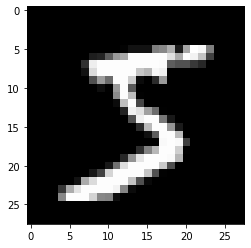

In [18]:
img = x_train[0]
label = t_train[0]
print(label) # 5

print(img.shape) # (784,)
img = img.reshape(28, 28) # 形状を元の画像サイズに変形
print(img.shape) # (28, 28)

img_show(img)

In [19]:
import pickle

def get_data():
    (x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test

def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    return y

In [20]:
x, t = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y) # 最も確率の高い要素のインデックスを取得
    if p == t[i]:
        accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


In [21]:
x, _ = get_data()
network = init_network()
W1, W2, W3 = network['W1'], network['W2'], network['W3']

print(x.shape)
print(x[0].shape)
print(W1.shape)
print(W2.shape)
print(W3.shape)

(10000, 784)
(784,)
(784, 50)
(50, 100)
(100, 10)


In [22]:
x, t = get_data()
network = init_network()

batch_size = 100 # バッチの数
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352
